In [5]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract
import matplotlib.image as mpimg
import numpy as np



In [3]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

 
 

Wines yi ee
KINGDOM OF SAUDI ARABIA 2 : ‏عي هودن‎ WEA oye eae

ee a

MINISTRY OF INTERIOR RESIDENT IDENTITY KAD) Dy
OSAMA FURQUAN SIDDIQUI MOINUDODIN

أسامة فرقان صديقي صمين الدين

A ‏نسغة‎ 8 599070 559416 oe
‏مكان الإصدار القدمات الاللتروتية‎

VAAT/e VISA Pet Efe ‏5ك‎ agast
“8 | ae oe!
‏الاسلام‎ deal! ‏الجنسية باكستان‎ |
‏ات 37 . إل‎ ١ ‏رخصة العمل‎
cae ‏لم‎ ED

  



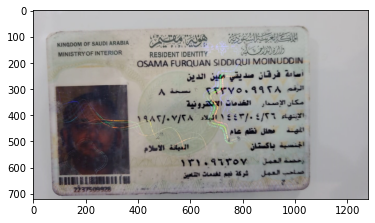

In [4]:
im =Image.open('image4.jpg')
text = pytesseract.image_to_string(im,lang='eng+ara')
print(text)
imgplot = plt.imshow(im)


In [20]:
def get_string(img_path, method):
    # Read image using opencv
    img = cv2.imread('image4.jpg')

    # Extract the file name without the file extension
    file_name = os.path.basename(img_path).split('.')[0]
    file_name = file_name.split()[0]

    # Create a directory for outputs
    output_path = os.path.join(output_dir, file_name)
    if not os.path.exists(output_path):
        os.makedirs(output_path)
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)         
        

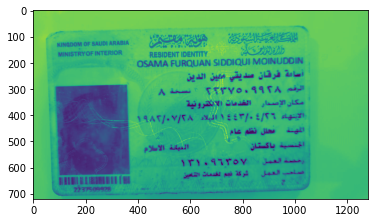

In [27]:
image = cv2.imread('image4.jpg')

gray = get_grayscale(image)
#imgplot = plt.imshow(gray)
#thresh = thresholding(gray)
#imgplot = plt.imshow(thresh)
#opening = opening(gray)
#imgplot = plt.imshow(opening)
#canny = canny(gray)
#imgplot = plt.imshow(canny)

skewed = deskew(gray)
imgplot = plt.imshow(skewed)

In [31]:
img = cv2.imread('image4.jpg') #load rgb image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #convert it to hsv

for x in range(0, len(hsv)):
    for y in range(0, len(hsv[0])):
        hsv[x, y][2] += value

img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("image_processed.jpg", img)

NameError: name 'value' is not defined